## 随机梯度下降法

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
m = 100000

x = np.random.normal(size=m)
X = x.reshape(-1, 1)
y = 4.0 * x + 3.0 + np.random.normal(0.0, 3.7, size=m)

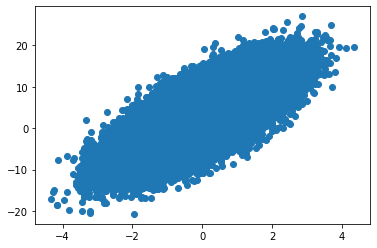

In [3]:
plt.scatter(x, y)
plt.show()

### 先用批量梯度下降法

In [4]:
# 定义计算损失函数值得方法
def J(theta, X_b, y):
    try:
        return np.sum((y - X_b.dot(theta)) ** 2)
    except:
        return float('inf')

In [5]:
# 定义计算导数值得方法
def dJ(theta, X_b, y):
    return X_b.T.dot(X_b.dot(theta) -y) * 2 / len(X_b)

In [6]:
# 梯度下降的过程
def gradient_descent(X_b, y, init_theta, eta, n_iters=1e4, epsilon=1e-8):
    theta = init_theta
    i_iters = 1
    while i_iters <= n_iters:
        # 首先求当前点的梯度
        gradient = dJ(theta, X_b, y)
        # 记下移动前的位置
        last_theta = theta
        # 往函数值小的方向移动
        theta = theta - eta * gradient
        # 退出机制
        if (abs(J(theta, X_b, y) - J(last_theta, X_b, y)) < epsilon):
            break
        i_iters += 1
    print('total steps:', i_iters)
    return theta

In [7]:
%%time
X_b = np.hstack([np.ones((len(X), 1)), X])
init_theta = np.zeros(X_b.shape[1])
eta = 0.01
theta = gradient_descent(X_b, y, init_theta, eta)

total steps: 744
CPU times: user 5.42 s, sys: 30.4 ms, total: 5.45 s
Wall time: 686 ms


In [8]:
theta

array([3.01021658, 3.99935185])

### 使用随机梯度下降法

In [9]:
# 随机梯度下降不需要计算损失函数值
# 因为用单个样本计算梯度是有误差的，所以用下降前后的损失值做比较也不能准确的表达是否到到谷底
# 因此计算损失值的差也不能做作为终止条件，so 计算损失函数值的方法就没用了

In [10]:
# 随机梯度，计算下降方向
def dJ_sgd(theta, X_b_i, y_i):
    return X_b_i.T.dot(X_b_i.dot(theta) - y_i)

# 注意：X_b_i 是一个包含两个元素的一维数组，转置不转置 对于计算都无所谓，但是为了标识最后得到一个列向量，还是转置
# X_b_i.dot(theta) 其实是两个向量点乘得到的是一个标量值， y_i 也是一个标量值，所以 (X_b_i.dot(theta) - y_i) 是一个标量值
# 最后的返回是  向量 * 标量 = 向量

In [11]:
# 随机梯度，下降过程
def sgd(X_b, y, init_theta, n_iters):
    t0, t1 = 5, 50
    def learning_rate(t):
        return t0 / (t1 + t)
    
    theta = init_theta
    for cur_iter in range(n_iters):
        rand_i = np.random.randint(len(X_b))
        gradient = dJ_sgd(theta, X_b[rand_i], y[rand_i])
        theta = theta - learning_rate(cur_iter) * gradient
    
    print('total steps:', cur_iter)
    return theta

In [12]:
%%time
X_b = np.hstack([np.ones((len(X), 1)), X])
init_theta = np.zeros(X_b.shape[1])
theta = sgd(X_b, y, init_theta, n_iters=len(X_b)//3)

total steps: 33332
CPU times: user 1.47 s, sys: 12.3 ms, total: 1.48 s
Wall time: 324 ms


In [13]:
theta

array([3.02720407, 4.01990032])

## 从上面的结果看出，随机梯度下降法每次计算的维数少了，但是下降的次数增多了。
## 但是整体的效率比批量梯度下降法要高